# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
API_URL_base = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{API_URL_base}appid={weather_api_key}&units={units}&q="

#Establish list variables
city_name_lst = []
cloudiness_lst = []
country_lst = []
date_lst =[]
humidity_lst = []
lat_lst =[]
lng_lst = []
max_temp_lst = []
wind_spd_lst = []
index_ctr = 0
set_ctr = 1

print("Starting Data Retrieval")
print("________________________")

#Loop through data
for index, city in enumerate(cities, start = 1):
    try:
        weather_response = requests.get(query_url + city).json()
        city_name_lst.append(weather_response["name"])
        cloudiness_lst.append(weather_response["clouds"]["all"])
        country_lst.append(weather_response["sys"]["country"])
        date_lst.append(weather_response["dt"])
        humidity_lst.append(weather_response["main"]["humidity"])
        lat_lst.append(weather_response["coord"]["lat"])
        lng_lst.append(weather_response["coord"]["lon"])
        max_temp_lst.append(weather_response['main']['temp_max'])
        wind_spd_lst.append(weather_response["wind"]["speed"])
        if index_ctr > 49:
            index_ctr = 0
            set_ctr = set_ctr + 1
    
        else:
            index_ctr = index_ctr + 1
            
        print(f"Processing Record {index_ctr} of Set {set_ctr} : {city}") 
  
    except(KeyError, IndexError):
        print(f"City not found. Skipping... {city}")
        
print("__________________________")
print("Data Retrieval Complete ")    


Starting Data Retrieval
________________________
Processing Record 1 of Set 1 : carnarvon
Processing Record 2 of Set 1 : salalah
City not found. Skipping... belushya guba
Processing Record 3 of Set 1 : vaini
Processing Record 4 of Set 1 : albany
Processing Record 5 of Set 1 : port-gentil
Processing Record 6 of Set 1 : northam
City not found. Skipping... palabuhanratu
Processing Record 7 of Set 1 : hobart
Processing Record 8 of Set 1 : nelson bay
Processing Record 9 of Set 1 : mogadishu
Processing Record 10 of Set 1 : mizan teferi
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : mount gambier
Processing Record 13 of Set 1 : turbat
Processing Record 14 of Set 1 : qaanaaq
Processing Record 15 of Set 1 : tuktoyaktuk
Processing Record 16 of Set 1 : longyearbyen
Processing Record 17 of Set 1 : thompson
City not found. Skipping... taolanaro
Processing Record 18 of Set 1 : port alfred
Processing Record 19 of Set 1 : san cristobal
Processing Record 20 of Set 1 : nizhniy o

Processing Record 30 of Set 4 : sendriceni
Processing Record 31 of Set 4 : asau
Processing Record 32 of Set 4 : sterling
Processing Record 33 of Set 4 : pundaguitan
City not found. Skipping... guicheng
Processing Record 34 of Set 4 : landeck
Processing Record 35 of Set 4 : avera
Processing Record 36 of Set 4 : bologoye
Processing Record 37 of Set 4 : khandyga
Processing Record 38 of Set 4 : lorengau
Processing Record 39 of Set 4 : ahipara
City not found. Skipping... tubruq
Processing Record 40 of Set 4 : fare
Processing Record 41 of Set 4 : roald
Processing Record 42 of Set 4 : lebu
Processing Record 43 of Set 4 : zheleznodorozhnyy
Processing Record 44 of Set 4 : maldonado
Processing Record 45 of Set 4 : katsuura
Processing Record 46 of Set 4 : flin flon
Processing Record 47 of Set 4 : winnemucca
Processing Record 48 of Set 4 : huangzhou
Processing Record 49 of Set 4 : nuuk
Processing Record 50 of Set 4 : atherton
Processing Record 0 of Set 5 : yokadouma
Processing Record 1 of Set 5 : 

Processing Record 13 of Set 8 : road town
Processing Record 14 of Set 8 : dinga
City not found. Skipping... ondorhaan
Processing Record 15 of Set 8 : los llanos de aridane
City not found. Skipping... ruatoria
Processing Record 16 of Set 8 : samoded
Processing Record 17 of Set 8 : dennery
Processing Record 18 of Set 8 : aklavik
Processing Record 19 of Set 8 : yuzhou
Processing Record 20 of Set 8 : kiri buru
Processing Record 21 of Set 8 : shimanovsk
Processing Record 22 of Set 8 : zilair
Processing Record 23 of Set 8 : san jose
Processing Record 24 of Set 8 : vermillion
Processing Record 25 of Set 8 : lagoa
Processing Record 26 of Set 8 : isangel
Processing Record 27 of Set 8 : carutapera
Processing Record 28 of Set 8 : medea
Processing Record 29 of Set 8 : sorong
Processing Record 30 of Set 8 : honiara
City not found. Skipping... lolua
Processing Record 31 of Set 8 : kavieng
Processing Record 32 of Set 8 : saint-pierre
Processing Record 33 of Set 8 : iracoubo
Processing Record 34 of Se

Processing Record 39 of Set 11 : jardim
Processing Record 40 of Set 11 : cozumel
Processing Record 41 of Set 11 : tafalla
Processing Record 42 of Set 11 : czersk
Processing Record 43 of Set 11 : ugoofaaru
Processing Record 44 of Set 11 : kangaatsiaq
Processing Record 45 of Set 11 : balkhash
Processing Record 46 of Set 11 : diego de almagro
Processing Record 47 of Set 11 : punta gorda
Processing Record 48 of Set 11 : suleja
__________________________
Data Retrieval Complete 


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create DataFrame
weather_df = pd.DataFrame({
    "City": city_name_lst,
    "Cloudiness": cloudiness_lst,
    "Country":country_lst,
    "Date":date_lst,
    "Humidity":humidity_lst,
    "Lat":lat_lst,
    "Lng":lng_lst,
    "Max Temp (F)":max_temp_lst,
    "Wind Speed (mph)":wind_spd_lst
    
})

weather_df.count()


City                558
Cloudiness          558
Country             558
Date                558
Humidity            558
Lat                 558
Lng                 558
Max Temp (F)        558
Wind Speed (mph)    558
dtype: int64

In [6]:
#Display DataFrame
weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed (mph)
0,Carnarvon,0,AU,1613013558,61,-24.8667,113.6333,80.60,17.27
1,Salalah,0,OM,1613013284,38,17.0151,54.0924,73.40,9.22
2,Vaini,75,TO,1613013531,83,-21.2000,-175.2000,82.40,13.80
3,Albany,100,US,1613013354,47,42.6001,-73.9662,23.00,3.20
4,Port-Gentil,96,GA,1613013216,80,-0.7193,8.7815,82.17,7.18
...,...,...,...,...,...,...,...,...,...
553,Kangaatsiaq,29,GL,1613013652,96,68.3065,-53.4641,13.51,9.42
554,Balkhash,0,KZ,1613013652,85,46.8440,74.9804,-0.40,8.95
555,Diego de Almagro,0,CL,1613013245,80,-26.3667,-70.0500,55.85,0.76
556,Punta Gorda,20,US,1613013496,88,26.9298,-82.0454,72.00,2.59


In [7]:
#Save data into CSV
weather_df.to_csv("output_data/cities1.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

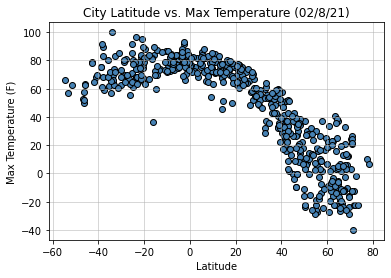

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp (F)"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (02/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


In [11]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Max Temperature.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

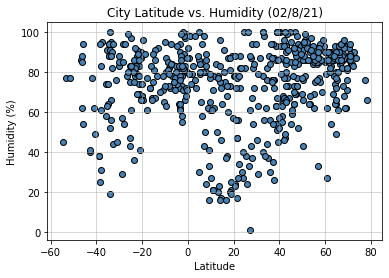

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (02/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


In [13]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Humidity.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

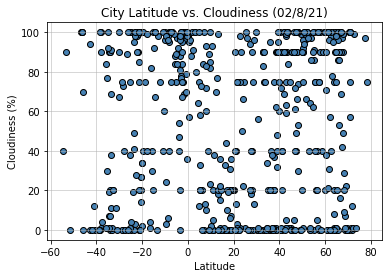

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (02/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

In [15]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Cloudiness.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

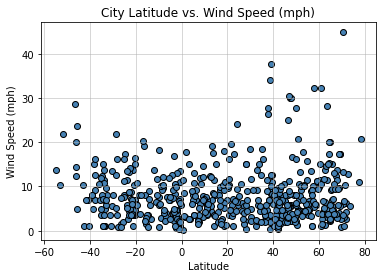

In [16]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed (mph)"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

In [17]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Wind Speed.png")

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [18]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
north_hemi = weather_df.loc[weather_df["Lat"] >= 0]
south_hemi = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.43x + 92.2
The r-squared is: -0.8819366220356988
The regression reflects a negative correlation.
The temprature decreases in the northern hemisphere as you move away from the equator.


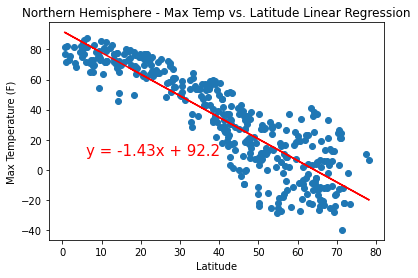

In [19]:
x_val = pd.to_numeric(north_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi["Max Temp (F)"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a negative correlation.")
print("The temprature decreases in the northern hemisphere as you move away from the equator.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.32x + 81.6
The r-squared is: 0.4693315229663904
The regression reflects a positive correlation.
The temprature increases in the southern hemisphere as you move away from the equator.


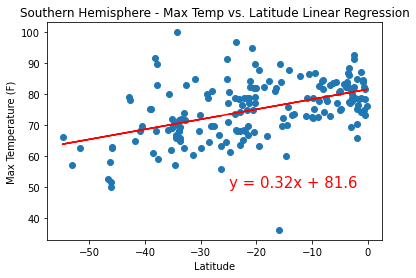

In [42]:
x_val = pd.to_numeric(south_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemi["Max Temp (F)"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a positive correlation.")
print("The temprature increases in the southern hemisphere as you move away from the equator.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.38x + 58.39
The r-squared is: 0.3620512493676266
The regression reflects a weak positive.


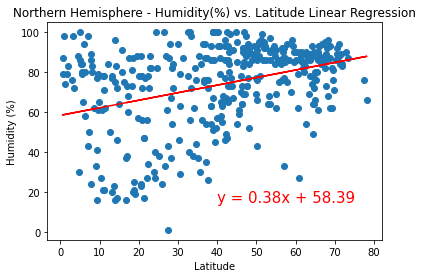

In [86]:
x_val = pd.to_numeric(north_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi["Humidity"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a weak positive.")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.28x + 81.27
The r-squared is: 0.24409970319936478
The regression reflects a weak positive correlation.


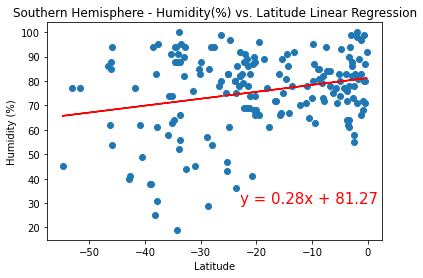

In [87]:
x_val = pd.to_numeric(south_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemi["Humidity"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-23,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a weak positive correlation.")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.33x + 36.28
The r-squared is: 0.16695958799539762
The regression relects a weak positive.


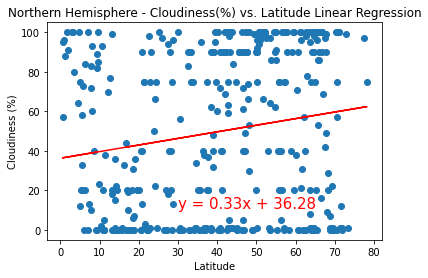

In [88]:
x_val = pd.to_numeric(north_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi["Cloudiness"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(30,11),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression relects a weak positive.")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 1.01x + 81.25
The r-squared is: 0.3559154840548997
The regression reflects a weak positive correlation.


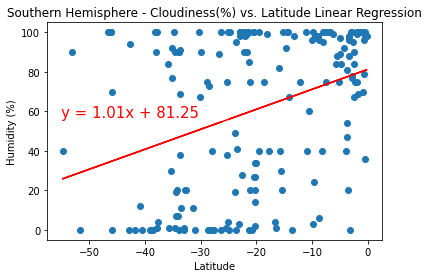

In [89]:
x_val = pd.to_numeric(south_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemi["Cloudiness"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-55,57),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a weak positive correlation.")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 6.79
The r-squared is: 0.08311794272339688
The regression reflects a weak positive correlation.


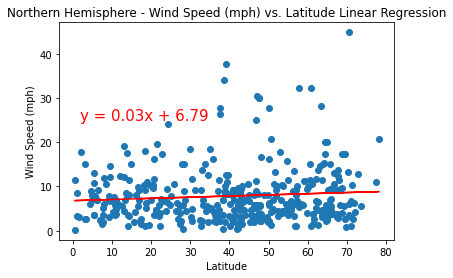

In [90]:
x_val = pd.to_numeric(north_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi["Wind Speed (mph)"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(2,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a weak positive correlation.")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.11x + 5.35
The r-squared is: -0.29399543452142035
The regression reflects a weak negative correlation.


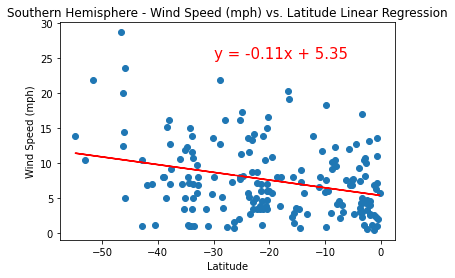

In [91]:
x_val = pd.to_numeric(south_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemi["Wind Speed (mph)"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a weak negative correlation.")

plt.show()